# Lab 5a: Greedy Algorithms

Lab associated with Module 5a: Greedy Algorithms

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

Install heapdict through Anaconda Navigator or Pip or Conda

In [5]:
import heapdict as heapdict

***

In [6]:
# Before anything else will setup some stuff <1>
global display_graph
# NOW WITH COLORS
def display_graph(G, bi=True, node_cols = {}):
    V = G.vertices
    dot = Digraph()
    exists = {}
    #print(G)
    for a,b in G.getDirEdges():
        val = str(a)
        
        if not val in exists:
            exists[val] = {}
        if not str(b[0]) in exists:
            exists[str(b[0])] = {}
        if (str(b[0]) in exists[val] or val in exists[str(b[0])]) and bi:
            continue
        
        if val in node_cols:
            if node_cols[val][0] == str(b[0]):
                dot.edge(val,str(b[0]),color=node_cols[val][1], label=str(b[1]))
            else:
                dot.edge(val,str(b[0]), label=str(b[1]))
        else:
            dot.edge(val,str(b[0]), label=str(b[1]))
        exists[val][str(b[0])] = True
    # --
    return dot
# --

### Section 1: Greedy Algorithm for Activity Selection

### Demo example

## Basically it just iterativly chooses the next closest start time after each finish time

![Example2](fig_greedy_1.jpg)

A simple greedy algorithm based on sorted activities can written as:

In [7]:
# activities are sorted by end time
def greedyActivitySelection(activities):
    
    schedule = []
    
    currentTime = activities[0][0] - 1 # start before any of the activities start.
    
    for i in range(len(activities)):
        start, finish = activities[i]
        if start > currentTime:
            schedule.append(i)
            currentTime = finish
    
    return schedule

Let us test above function as:

In [8]:
activities = [  [1,4],[2,5],[3,6],[5,7],[3,8],[6,9],[8,10],[9,11],[5,12],[6,13],[8,14],[13,15] ]


activityList = greedyActivitySelection(activities)



#sorted_activities = [activities[act] for act in activityList]
#sorted_activities = sorted(sorted_activities, key=lambda item: item[0], reverse=False)
#print(sorted_activities)


print("Solution:")

for act in activityList:
    print(activities[act])

Solution:
[1, 4]
[5, 7]
[8, 10]
[13, 15]


Modify above code to implement sorting of the activities. 

***

### <font color='red'> Section 2: Dynamic Programming version of Activity Selection. </font>

In [9]:
#### TODO ####
### Good Luck ###

activities = [  [1,4],[2,5],[3,6],[5,7],[3,8],[6,9],[8,10],[9,11],[5,12],[6,13],[8,14],[13,15] ]

def dpActivitySelection(activities):
    
    n = len(activities)
    c = [[] for x in range(n)]
    for i in range(n):
        for j in range(n):
            start, finish = activities[i][0], activities[j][1]
            if finish < start and len(c[i]) < len(c[j]):
                #temp = [x for x in c[j]]
                c[i] = [x for x in c[j]]
        c[i].append(activities[i])
    # --
    current_max = []
    for x in c:
        if len(current_max) < len(x):
            current_max = x
    return current_max, c
# --
    
    


kek, c = dpActivitySelection(activities)
print('\n')
print(kek)
print('\n')
[print(i) for i in c]
print('\n')



[[1, 4], [5, 7], [8, 10], [13, 15]]


[[1, 4]]
[[2, 5]]
[[3, 6]]
[[1, 4], [5, 7]]
[[3, 8]]
[[1, 4], [6, 9]]
[[1, 4], [5, 7], [8, 10]]
[[1, 4], [5, 7], [9, 11]]
[[1, 4], [5, 12]]
[[1, 4], [6, 13]]
[[1, 4], [5, 7], [8, 14]]
[[1, 4], [5, 7], [8, 10], [13, 15]]




***

### Section 3: Huffman Coding

In [10]:
class node:
    
    def __init__(self, freq, symbol, left=None, right=None):
        
        self.freq = freq
        self.symbol = symbol
 
        self.left = left
        self.right = right
 
        self.val = ''

In [11]:
letters = ['A', 'B', 'C', 'D', 'E', 'F']
 
frequency = [45, 13, 12, 16, 9, 5]


# A little addition that get frequency from input
input_string = "I’ll have you know I graduated top of my class in the Navy Seals, and I’ve been involved in numerous secret raids on Al-Quaeda, and I have over 300 confirmed kills."
input_string += "I am trained in gorilla warfare and I’m the top sniper in the entire US armed forces. You are nothing to me but just another target. I will wipe you out with precision the likes of which has never been seen before on this Earth, mark my words."

letters_set = set(input_string)
letters_set = {x:0 for x in letters_set}

for char in input_string:
    letters_set[char] += 1

print('\n')

print(letters_set)

print('\n')


letters = list(letters_set.keys())

frequency = list(letters_set.values())

print(letters)
print(frequency)




{'u': 10, 'E': 1, '3': 1, 'k': 4, 'I': 7, 'N': 1, 'd': 12, 'l': 13, 's': 16, 'Q': 1, 'Y': 1, 't': 21, 'i': 21, 'A': 1, 'r': 23, 'f': 6, 'p': 5, ' ': 77, 'b': 4, '-': 1, 'o': 23, 'h': 14, 'w': 7, '.': 4, 'g': 4, 'n': 24, 'm': 9, 'e': 40, 'j': 1, 'v': 8, 'y': 5, 'a': 25, 'c': 6, '’': 3, 'S': 2, '0': 2, 'U': 1, ',': 3}


['u', 'E', '3', 'k', 'I', 'N', 'd', 'l', 's', 'Q', 'Y', 't', 'i', 'A', 'r', 'f', 'p', ' ', 'b', '-', 'o', 'h', 'w', '.', 'g', 'n', 'm', 'e', 'j', 'v', 'y', 'a', 'c', '’', 'S', '0', 'U', ',']
[10, 1, 1, 4, 7, 1, 12, 13, 16, 1, 1, 21, 21, 1, 23, 6, 5, 77, 4, 1, 23, 14, 7, 4, 4, 24, 9, 40, 1, 8, 5, 25, 6, 3, 2, 2, 1, 3]


In [12]:

# Let us make use of list to store nodes
 
nodes = []
 
# Put all the nodes in the list first

for x in range(len(letters)):
    
    nodes.append(node(frequency[x], letters[x]))

Time to build the tree

In [13]:
while len(nodes) > 1:
    
    # We need to sort the nodes based on the value of the frequency-field
    nodes = sorted(nodes, key=lambda x: x.freq)
 
    # The following two nodes are the smallest, let us call them S1 and S2

    S1 = nodes[0]
    S2 = nodes[1]
 
    S1.val = 0
    S2.val = 1

    # make the super node
    
    S12 = node(S1.freq + S2.freq, S1.symbol + S2.symbol, S1, S2)
 
    # remove the two nodes from our consideration next
    
    nodes.remove(S1)
    nodes.remove(S2)
    
    nodes.append(S12)

Okay, now we have built the tree, let us display the codes. Note, we will have to recursively traverse the tree

In [14]:
def printCode(node, val=''):
    
    code = val + str(node.val)

    if node.left:
        printCode(node.left, code)
        
    if node.right:
        printCode(node.right, code)    
        
    if not (node.left and node.right):
        print('Letter = {}, Code = {}'.format(node.symbol, code))

In [15]:
printCode(nodes[0])

Letter = e, Code = 000
Letter = m, Code = 00100
Letter = u, Code = 00101
Letter = t, Code = 0011
Letter = i, Code = 0100
Letter = p, Code = 010100
Letter = y, Code = 010101
Letter = -, Code = 01011000
Letter = j, Code = 01011001
Letter = ’, Code = 0101101
Letter = f, Code = 010111
Letter = r, Code = 0110
Letter = o, Code = 0111
Letter = n, Code = 1000
Letter = d, Code = 10010
Letter = c, Code = 100110
Letter = ,, Code = 1001110
Letter = U, Code = 10011110
Letter = S, Code = 10011111
Letter = a, Code = 1010
Letter = l, Code = 10110
Letter = h, Code = 10111
Letter = I, Code = 110000
Letter = w, Code = 110001
Letter = s, Code = 11001
Letter = v, Code = 110100
Letter = k, Code = 1101010
Letter = b, Code = 1101011
Letter = ., Code = 1101100
Letter = g, Code = 1101101
Letter = 0, Code = 11011100
Letter = E, Code = 110111010
Letter = 3, Code = 110111011
Letter = N, Code = 110111100
Letter = Q, Code = 110111101
Letter = Y, Code = 110111110
Letter = A, Code = 110111111
Letter =  , Code = 111


***

### <font color='red'> Section 4: Prim's Algorithm. </font>

Graph's Preliminaries

In [16]:
from graph import *

In [17]:
G = Graph()

for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']:
    G.addVertex( Node(i) )

In [18]:
V = G.vertices

#0, 1, 2, 3, 4, 5, 6, 7, 8
#A, B, C, D, E, F, G, H, I

G.addBiEdge( V[0], V[1], 4)

G.addBiEdge( V[0], V[7] , 8)

G.addBiEdge( V[1], V[7], 11)

G.addBiEdge( V[1], V[2], 8)

G.addBiEdge( V[2], V[3], 7)

G.addBiEdge( V[3], V[4], 9)

G.addBiEdge( V[3], V[5], 14 )

G.addBiEdge( V[4], V[5], 10 )

G.addBiEdge( V[2], V[5], 4 )

G.addBiEdge( V[2], V[8], 2 )

G.addBiEdge( V[5], V[6], 2 )

G.addBiEdge( V[6], V[7], 1 )

G.addBiEdge( V[6], V[8], 6 )

G.addBiEdge( V[7], V[8], 7 )




In [19]:
print(G)

Graph with:
	 Vertices:
	A,B,C,D,E,F,G,H,I,
	 Edges:
	(A,(<graph.Node object at 0x000001EA763EF250>, 4)) (A,(<graph.Node object at 0x000001EA763EFBB0>, 8)) (B,(<graph.Node object at 0x000001EA763EFF10>, 4)) (B,(<graph.Node object at 0x000001EA763EFBB0>, 11)) (B,(<graph.Node object at 0x000001EA763EF760>, 8)) (C,(<graph.Node object at 0x000001EA763EF250>, 8)) (C,(<graph.Node object at 0x000001EA763EFB20>, 7)) (C,(<graph.Node object at 0x000001EA763EF370>, 4)) (C,(<graph.Node object at 0x000001EA763EF970>, 2)) (D,(<graph.Node object at 0x000001EA763EF760>, 7)) (D,(<graph.Node object at 0x000001EA763EFC40>, 9)) (D,(<graph.Node object at 0x000001EA763EF370>, 14)) (E,(<graph.Node object at 0x000001EA763EFB20>, 9)) (E,(<graph.Node object at 0x000001EA763EF370>, 10)) (F,(<graph.Node object at 0x000001EA763EFB20>, 14)) (F,(<graph.Node object at 0x000001EA763EFC40>, 10)) (F,(<graph.Node object at 0x000001EA763EF760>, 4)) (F,(<graph.Node object at 0x000001EA763EF460>, 2)) (G,(<graph.Node object 

This is what we had in the lectures as the slow implementation of Prim's Algorithm

In [20]:
# G is graph
# s is the node to start

def slowPrim(G, s):
    
    # first, find the lightest edge leaving s
    bestWt = np.inf
    bestu = None
    
    for u,wt in s.getOutNeighborsWithWeights():
        
        if wt < bestWt:
            bestWt = wt
            bestu = u
    
    MST = [ (s, bestu) ]
    verticesVisited = [s,bestu]
    
    while len(verticesVisited) < len(G.vertices): # danger! this will loop forever if the graph isn't connected...
        
        # find the lightest edge (x,v) so that x has been visited and v hasn't.
        bestWt = np.inf
        bestv = None
        bestx = None
        
        for x in verticesVisited:
            for v,wt in x.getOutNeighborsWithWeights():
                
                if v in verticesVisited:
                    continue
                
                if wt < bestWt:
                    bestWt = wt
                    bestv = v
                    bestx = x
                    
        MST.append((bestx,bestv))
        verticesVisited.append(bestv)
    
    return MST

In [21]:
T = slowPrim(G, G.vertices[0])
print(T[0][0], '-', T[0][1].estD, '\n')

total = 0
for x,y in T:
    print(x,y)
    total += y.estD

print(f'Total: {total}')

A - inf 

A B
A H
H G
G F
F C
C I
C D
D E
Total: inf


Okay, it seems to be working fine, but as we discussed, will be quite slow. Let us see if we can work on the faster version of the code as:

In [22]:
def prim(G,w):
    
    for v in G.vertices:
        v.estD = np.inf
    
    w.estD = 0
    MST = []
    unvisitedVertices = heapdict.heapdict()
    
    for v in G.vertices:
        unvisitedVertices[v] = v.estD
    
    while len(unvisitedVertices) > 0:
        
        # find the u with the minimum estD, using the heap
        u, dist = unvisitedVertices.popitem() 
        if u.estD == np.inf:
            # then there is nothing more that I can reach; this shouldn't happen if the graph is connected
            return "Graph disconnected :("
        
        # add u to the MST
        if u.parent != None:  # don't do it for the first vertex
            MST.append((u.parent,u))
        
        # update u's neighbors
        for v,wt in u.getOutNeighborsWithWeights():
            if v in unvisitedVertices:
                if wt < v.estD:
                    v.estD = wt
                    unvisitedVertices[v] =  wt #update the key in the heapdict
                    v.parent = u # v points to u now
                    
    return MST

In [23]:
T = prim(G, G.vertices[0])

total = 0
for x,y in T:
    print(x,y)
    total += y.estD
print(f'Total: {total}')

A B
B C
C I
C F
F G
G H
C D
D E
Total: 37


In [24]:
# PRIM TIME COMPARISON
from time import process_time
import random

G2 = Graph()

for i in range(0,1000):
    G2.addVertex( Node(i) )

V2 = G2.vertices

for idx in range(1,1000):
    G2.addBiEdge( V2[idx-1], V2[idx], random.randint(1, 45) )
    G2.addBiEdge( V2[random.randint(4, 950)], V2[random.randint(4, 950)], random.randint(1, 45) )
    
# --

#display(display_graph(G))

test_number = 1

# - Test -
start = process_time()

T = slowPrim(G2, G2.vertices[0])

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'slowPrim', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1


# - Test -
start = process_time()

T = prim(G2, G2.vertices[0])

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'prim', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1


# - Test -
start = process_time()

T = slowPrim(G2, G2.vertices[0])

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'slowPrim', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1


# - Test -
start = process_time()

T = prim(G2, G2.vertices[0])

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'prim', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1







Test No. 1, Function: slowPrim, Time: 7.96875
Total: inf


Test No. 2, Function: prim, Time: 0.03125
Total: 13129


Test No. 3, Function: slowPrim, Time: 7.953125
Total: 13129


Test No. 4, Function: prim, Time: 0.046875
Total: 13129




***

### <font color='red'> Section 5: In lights of Prim's Algorithm that you developed above, make your best effort to implement Kruskal's Algorithm. </font>

Total: 30


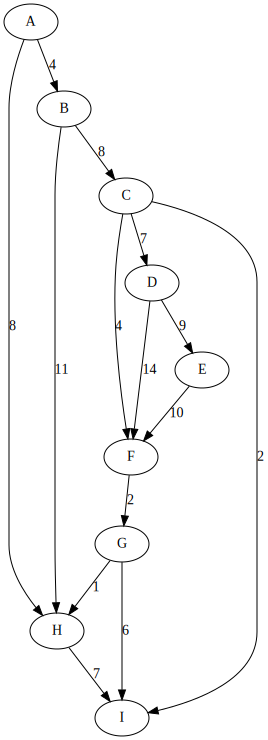

In [25]:
#### TODO ####
### Good Luck ###

#Kruskal


class mst_set:
    
    set_ = {}

    def __init__(self, G):
        for vert in G.vertices:
            self.set_[str(vert)] = vert
        return

    # Keep looking until you get root, which in a set for v is v
    def find(self, v):
        #if v.parent == v:
        #    return v
        #return find(v.parent)
        if self.set_[str(v)] == v:
            return v
        return self.find(self.set_[str(v)])

    # Make on of them the root parent of the other
    def union(self, a, b):
        a_ = self.find(str(a))
        b_ = self.find(str(b))
        self.set_[str(a_)] = b_
        return

def kruskal(G):
    
    # Sort edges based on out nabour edge wights
    #NOTE: G.getDirEdges()[0] - > [<graph.Node object at 0x000001D6F2595D00>, (<graph.Node object at 0x000001D6F2595C10>, 4)]
    edges = sorted(G.getDirEdges(), key=lambda node: node[1][1], reverse=False)
    
    vertices = G.vertices
    MST = []
    MST_str = []
    
    set_ = mst_set(G)
    
    
    
    # Make set
    #for vert in vertices:
    #    MST[vert.value] = {}
    #for vert in vertices:
    #    vert.parent = vert
    
    #print(MST)
    for u, v in edges:
        #if not v[0].value in MST[u.value] and not u.value in MST[v[0].value]:
        #if not v[0].value in MST[u.value]:
        x, y = set_.find(u), set_.find(v[0])
        if set_.find(u) != set_.find(v[0]): 
            #MST[u.value] = MST.pop(v[0].value,{})
            #MST[v[0].value] = {u.value}
            #for x in v[0].value:
            #    MST[u.value][x] = True
            #for x in u.value:
            #    MST[v[0].value][x] = True
            #KEK[u.value] = v[0].value
            # --- ADD TO LIST
            #MST_str.append((u.value, v[0].value))
            MST.append((u, v[0]))
            # COMBINE A INTO --> B by setting a root as b
            set_.union(u, v[0])
            #set_.union(x,y)
            
    
    return MST

MST = kruskal(G)

#print(MST)

total = 0
for x,y in MST:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

display(display_graph(G))

### Demo example

## [('G', 'H'), ('C', 'I'), ('F', 'G'), ('A', 'B'), ('C', 'F'), ('C', 'D'), ('A', 'H'), ('D', 'E')]

![Example](eg_1.png)

In [26]:
test_number = 1

# - Test -
start = process_time()

T = slowPrim(G2, G2.vertices[0])

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'slowPrim', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1


# - Test -
start = process_time()

T = prim(G2, G2.vertices[0])

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'prim', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1


# - Test -
start = process_time()

T = kruskal(G2)

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'kruskal', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1

# - Test -
start = process_time()

T = prim(G2, G2.vertices[0])

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'prim', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1


# - Test -
start = process_time()

T = kruskal(G2)

end = process_time() - start
print('Test No. {}, Function: {}, Time: {}'.format(test_number, 'kruskal', end))

total = 0
for x,y in T:
    #print(x,y)
    total += y.estD
print(f'Total: {total}')

print('\n')

test_number += 1



Test No. 1, Function: slowPrim, Time: 7.921875
Total: 13129


Test No. 2, Function: prim, Time: 0.046875
Total: 13129


Test No. 3, Function: kruskal, Time: 0.796875
Total: 11791


Test No. 4, Function: prim, Time: 0.03125
Total: 13129


Test No. 5, Function: kruskal, Time: 0.8125
Total: 11791




In [27]:
# Scraps


'''

# Make set
    #for vert in vertices:
    #    MST[vert.value] = {}
    #for vert in vertices:
    #    vert.parent = vert
    
    #print(MST)
    for u, v in edges:
        #if not v[0].value in MST[u.value] and not u.value in MST[v[0].value]:
        #if not v[0].value in MST[u.value]:
        x, y = set_.find(u), set_.find(v[0])
        if set_.find(u) != set_.find(v[0]): 
            #MST[u.value] = MST.pop(v[0].value,{})
            #MST[v[0].value] = {u.value}
            #for x in v[0].value:
            #    MST[u.value][x] = True
            #for x in u.value:
            #    MST[v[0].value][x] = True
            #KEK[u.value] = v[0].value
            MST.append((u.value, v[0].value))
            #set_.union(u, v[0])
            set_.union(x,y)

'''

'\n\n# Make set\n    #for vert in vertices:\n    #    MST[vert.value] = {}\n    #for vert in vertices:\n    #    vert.parent = vert\n    \n    #print(MST)\n    for u, v in edges:\n        #if not v[0].value in MST[u.value] and not u.value in MST[v[0].value]:\n        #if not v[0].value in MST[u.value]:\n        x, y = set_.find(u), set_.find(v[0])\n        if set_.find(u) != set_.find(v[0]): \n            #MST[u.value] = MST.pop(v[0].value,{})\n            #MST[v[0].value] = {u.value}\n            #for x in v[0].value:\n            #    MST[u.value][x] = True\n            #for x in u.value:\n            #    MST[v[0].value][x] = True\n            #KEK[u.value] = v[0].value\n            MST.append((u.value, v[0].value))\n            #set_.union(u, v[0])\n            set_.union(x,y)\n\n'

***